**Parameter exploration tasks**

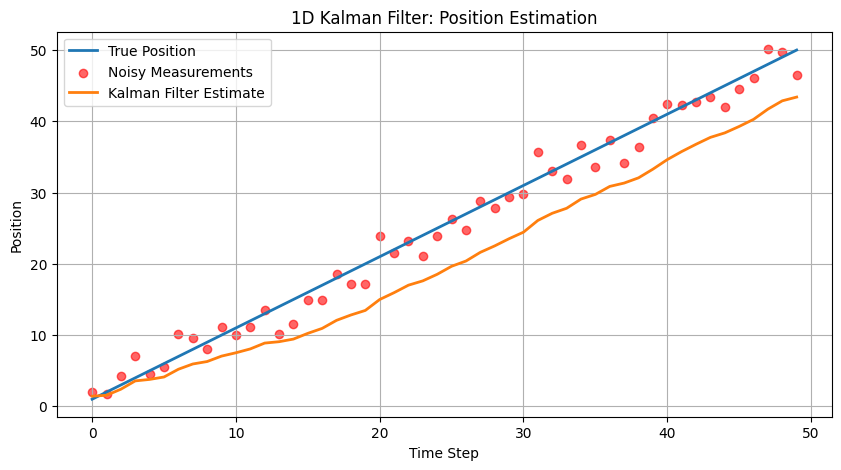

In [13]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)  # for reproducibility
n_steps = 50        # number of time steps
true_velocity = 1  # constant velocity
dt = 1.0           # time step
true_positions = []
measurements = []
position = 0.0
measurement_noise_std = 2.0  # sensor noise (R)
for _ in range(n_steps):
    position += true_velocity * dt
    true_positions.append(position)
    noisy_measurement = position + np.random.normal(0, measurement_noise_std)
    measurements.append(noisy_measurement)
# Initial state estimate (position only)
x_est = np.array([[0.0]])  # initial guess

# Initial uncertainty
P = np.array([[10.0]])     # large value = low confidence

# State transition matrix
F = np.array([[1.0]])

# Measurement matrix
H = np.array([[1.0]])

# Process noise (model uncertainty)
Q = np.array([[0.1]])

# Measurement noise (sensor uncertainty)
R = np.array([[measurement_noise_std ** 2]])
estimates = []
for z in measurements:
    # ------------------
    # PREDICTION STEP
    # ------------------
    x_pred = F @ x_est
    P_pred = F @ P @ F.T + Q

    # ------------------
    # UPDATE STEP
    # ------------------
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)

    y = np.array([[z]]) - H @ x_pred   # innovation
    x_est = x_pred + K @ y

    P = (np.eye(1) - K @ H) @ P_pred

    estimates.append(x_est.item())
plt.figure(figsize=(10, 5))
plt.plot(true_positions, label="True Position", linewidth=2)
plt.scatter(range(n_steps), measurements, label="Noisy Measurements", color="red", alpha=0.6)
plt.plot(estimates, label="Kalman Filter Estimate", linewidth=2)
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("1D Kalman Filter: Position Estimation")
plt.legend()
plt.grid(True)
plt.show()

Now i will increase the value of R

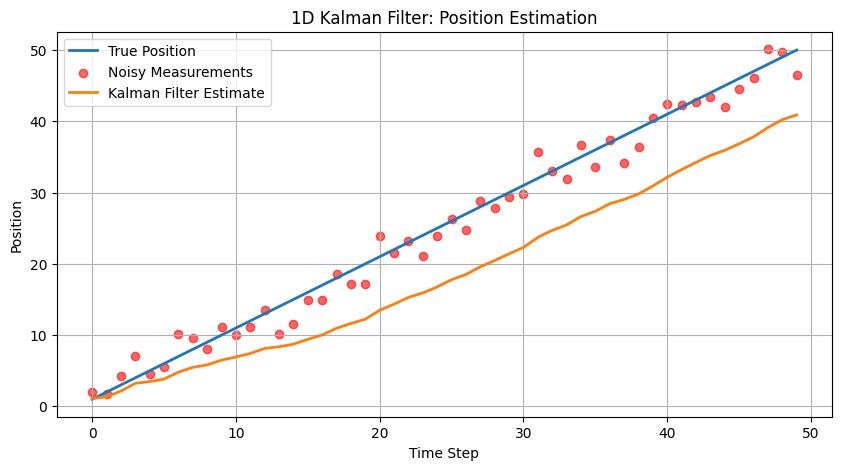

In [14]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)  # for reproducibility
n_steps = 50        # number of time steps
true_velocity = 1  # constant velocity
dt = 1.0           # time step
true_positions = []
measurements = []
position = 0.0
measurement_noise_std = 2.0  # sensor noise (R)
for _ in range(n_steps):
    position += true_velocity * dt
    true_positions.append(position)
    noisy_measurement = position + np.random.normal(0, measurement_noise_std)
    measurements.append(noisy_measurement)
# Initial state estimate (position only)
x_est = np.array([[0.0]])  # initial guess

# Initial uncertainty
P = np.array([[10.0]])     # large value = low confidence

# State transition matrix
F = np.array([[1.0]])

# Measurement matrix
H = np.array([[1.0]])

# Process noise (model uncertainty)
Q = np.array([[0.1]])

# Measurement noise (sensor uncertainty)
R = np.array([[measurement_noise_std ** 3]])
estimates = []
for z in measurements:
    # ------------------
    # PREDICTION STEP
    # ------------------
    x_pred = F @ x_est
    P_pred = F @ P @ F.T + Q

    # ------------------
    # UPDATE STEP
    # ------------------
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)

    y = np.array([[z]]) - H @ x_pred   # innovation
    x_est = x_pred + K @ y

    P = (np.eye(1) - K @ H) @ P_pred

    estimates.append(x_est.item())
plt.figure(figsize=(10, 5))
plt.plot(true_positions, label="True Position", linewidth=2)
plt.scatter(range(n_steps), measurements, label="Noisy Measurements", color="red", alpha=0.6)
plt.plot(estimates, label="Kalman Filter Estimate", linewidth=2)
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("1D Kalman Filter: Position Estimation")
plt.legend()
plt.grid(True)
plt.show()

Clearly the estimate curve moved down....because it trusts prediction model more than before...or trusts measurement values lesser

Now i will increase Q

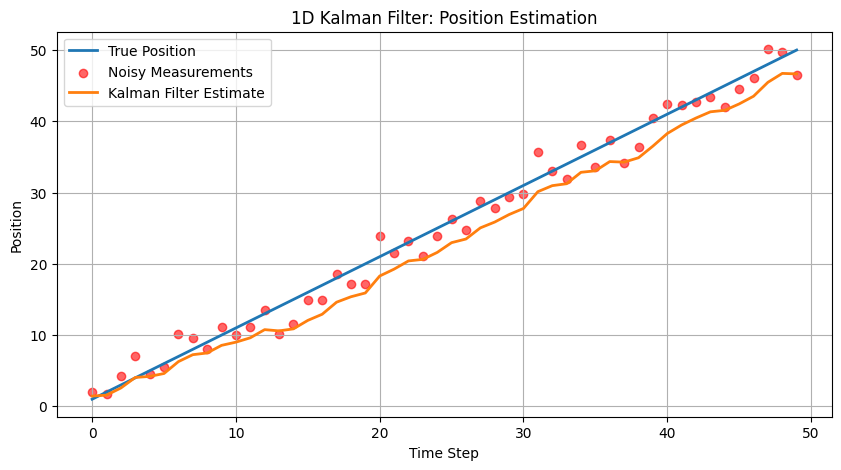

In [15]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)  # for reproducibility
n_steps = 50        # number of time steps
true_velocity = 1  # constant velocity
dt = 1.0           # time step
true_positions = []
measurements = []
position = 0.0
measurement_noise_std = 2.0  # sensor noise (R)
for _ in range(n_steps):
    position += true_velocity * dt
    true_positions.append(position)
    noisy_measurement = position + np.random.normal(0, measurement_noise_std)
    measurements.append(noisy_measurement)
# Initial state estimate (position only)
x_est = np.array([[0.0]])  # initial guess

# Initial uncertainty
P = np.array([[10.0]])     # large value = low confidence

# State transition matrix
F = np.array([[1.0]])

# Measurement matrix
H = np.array([[1.0]])

# Process noise (model uncertainty)
Q = np.array([[0.5]])

# Measurement noise (sensor uncertainty)
R = np.array([[measurement_noise_std ** 2]])
estimates = []
for z in measurements:
    # ------------------
    # PREDICTION STEP
    # ------------------
    x_pred = F @ x_est
    P_pred = F @ P @ F.T + Q

    # ------------------
    # UPDATE STEP
    # ------------------
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)

    y = np.array([[z]]) - H @ x_pred   # innovation
    x_est = x_pred + K @ y

    P = (np.eye(1) - K @ H) @ P_pred

    estimates.append(x_est.item())
plt.figure(figsize=(10, 5))
plt.plot(true_positions, label="True Position", linewidth=2)
plt.scatter(range(n_steps), measurements, label="Noisy Measurements", color="red", alpha=0.6)
plt.plot(estimates, label="Kalman Filter Estimate", linewidth=2)
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("1D Kalman Filter: Position Estimation")
plt.legend()
plt.grid(True)
plt.show()

The estimate now got very close to the measurement values as expected because due to more process noise, model cant be trusted more

Now with small uncertainity

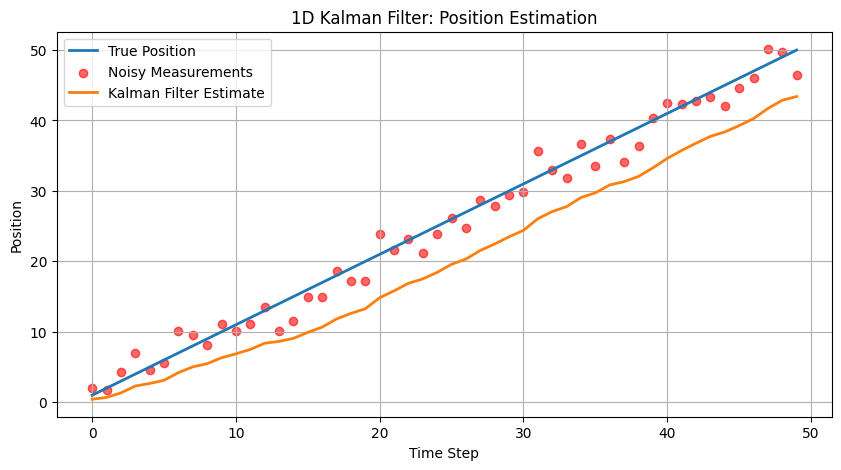

In [16]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)  # for reproducibility
n_steps = 50        # number of time steps
true_velocity = 1  # constant velocity
dt = 1.0           # time step
true_positions = []
measurements = []
position = 0.0
measurement_noise_std = 2.0  # sensor noise (R)
for _ in range(n_steps):
    position += true_velocity * dt
    true_positions.append(position)
    noisy_measurement = position + np.random.normal(0, measurement_noise_std)
    measurements.append(noisy_measurement)
# Initial state estimate (position only)
x_est = np.array([[0.0]])  # initial guess

# Initial uncertainty
P = np.array([[1.0]])     # large value = low confidence

# State transition matrix
F = np.array([[1.0]])

# Measurement matrix
H = np.array([[1.0]])

# Process noise (model uncertainty)
Q = np.array([[0.1]])

# Measurement noise (sensor uncertainty)
R = np.array([[measurement_noise_std ** 2]])
estimates = []
for z in measurements:
    # ------------------
    # PREDICTION STEP
    # ------------------
    x_pred = F @ x_est
    P_pred = F @ P @ F.T + Q

    # ------------------
    # UPDATE STEP
    # ------------------
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)

    y = np.array([[z]]) - H @ x_pred   # innovation
    x_est = x_pred + K @ y

    P = (np.eye(1) - K @ H) @ P_pred

    estimates.append(x_est.item())
plt.figure(figsize=(10, 5))
plt.plot(true_positions, label="True Position", linewidth=2)
plt.scatter(range(n_steps), measurements, label="Noisy Measurements", color="red", alpha=0.6)
plt.plot(estimates, label="Kalman Filter Estimate", linewidth=2)
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("1D Kalman Filter: Position Estimation")
plt.legend()
plt.grid(True)
plt.show()

As we can see it is clearly believing more in the prediction and gradually started trusting measurements too...and the curve after sometime started looking similar to the curve in the first case..so it adapts well

Wrong initial state

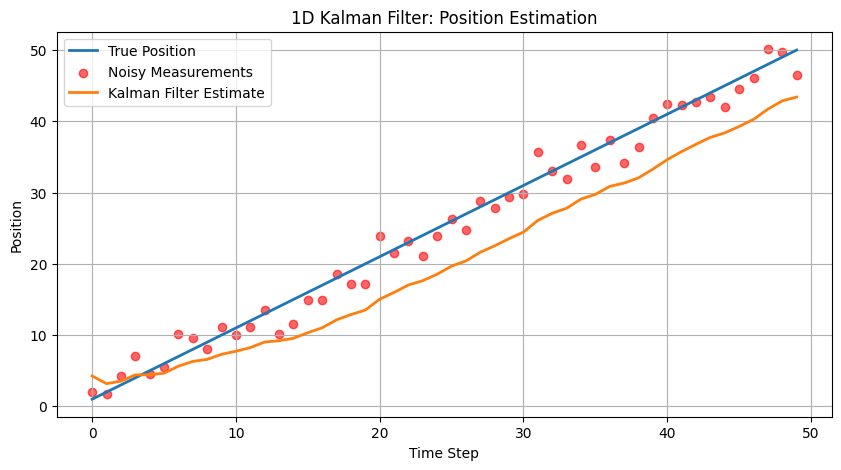

In [17]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)  # for reproducibility
n_steps = 50        # number of time steps
true_velocity = 1  # constant velocity
dt = 1.0           # time step
true_positions = []
measurements = []
position = 0.0
measurement_noise_std = 2.0  # sensor noise (R)
for _ in range(n_steps):
    position += true_velocity * dt
    true_positions.append(position)
    noisy_measurement = position + np.random.normal(0, measurement_noise_std)
    measurements.append(noisy_measurement)
# Initial state estimate (position only)
x_est = np.array([[10.0]])  # initial guess

# Initial uncertainty
P = np.array([[10.0]])     # large value = low confidence

# State transition matrix
F = np.array([[1.0]])

# Measurement matrix
H = np.array([[1.0]])

# Process noise (model uncertainty)
Q = np.array([[0.1]])

# Measurement noise (sensor uncertainty)
R = np.array([[measurement_noise_std ** 2]])
estimates = []
for z in measurements:
    # ------------------
    # PREDICTION STEP
    # ------------------
    x_pred = F @ x_est
    P_pred = F @ P @ F.T + Q

    # ------------------
    # UPDATE STEP
    # ------------------
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)

    y = np.array([[z]]) - H @ x_pred   # innovation
    x_est = x_pred + K @ y

    P = (np.eye(1) - K @ H) @ P_pred

    estimates.append(x_est.item())
plt.figure(figsize=(10, 5))
plt.plot(true_positions, label="True Position", linewidth=2)
plt.scatter(range(n_steps), measurements, label="Noisy Measurements", color="red", alpha=0.6)
plt.plot(estimates, label="Kalman Filter Estimate", linewidth=2)
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("1D Kalman Filter: Position Estimation")
plt.legend()
plt.grid(True)
plt.show()

Clearly after sometime the plot again resembles the first plot..so it did recover very well

**Coding Extensions**

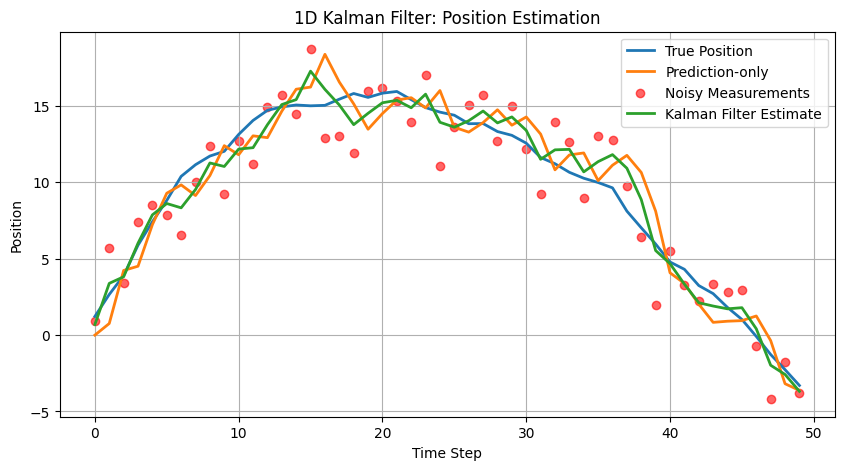

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)  # for reproducibility
n_steps = 50        # number of time steps
dt = 1.0           # time step
true_positions = []
measurements = []
position = 0.0
velocity=1.0
measurement_noise_std = 2.0  # sensor noise (R)
acceleration_std= 0.3 # random acceleration
for _ in range(n_steps):
    acceleration = np.random.normal(0, acceleration_std)
    velocity += acceleration * dt
    position += velocity * dt+ 0.5*acceleration*dt**2
    true_positions.append(position)
    noisy_measurement = position + np.random.normal(0, measurement_noise_std)
    measurements.append(noisy_measurement)
# Initial state estimate (position only)
x_est = np.array([[0.0],[0.0]])  # initial guess

# Initial uncertainty
P = np.array([[10.0,0.0],[0.0,1.0]])     # large value = low confidence

# State transition matrix
F = np.array([[1.0 , dt], [0,1]])

# Measurement matrix
H = np.array([[1.0,0]]) # only position is measured

# Process noise (model uncertainty)
Q = np.array([[dt**4/4,dt**3/2],[dt**3/2,dt**2]])*acceleration_std**2

# Measurement noise (sensor uncertainty)
R = np.array([[measurement_noise_std ** 2]])
estimates = []
predictions=[]
for z in measurements:
    # ------------------
    # PREDICTION STEP
    # ------------------
    x_pred = F @ x_est
    P_pred = F @ P @ F.T + Q
    predictions.append(x_pred[0,0])
    # ------------------
    # UPDATE STEP
    # ------------------
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)

    y = np.array([[z]]) - H @ x_pred   # innovation
    x_est = x_pred + K @ y

    P = (np.eye(2) - K @ H) @ P_pred

    estimates.append(x_est[0,0])
plt.figure(figsize=(10, 5))
plt.plot(true_positions, label="True Position", linewidth=2)
plt.plot(predictions,label="Prediction-only",linewidth=2)
plt.scatter(range(n_steps), measurements, label="Noisy Measurements", color="red", alpha=0.6)
plt.plot(estimates, label="Kalman Filter Estimate", linewidth=2)
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("1D Kalman Filter: Position Estimation")
plt.legend()
plt.grid(True)
plt.show()

Clearly kalman estimate is the closest we have to the true value out of the three options of prediction-only,measurements and filter estimate.Idk why...the inverted U shape looks weird..i will try to change the seed

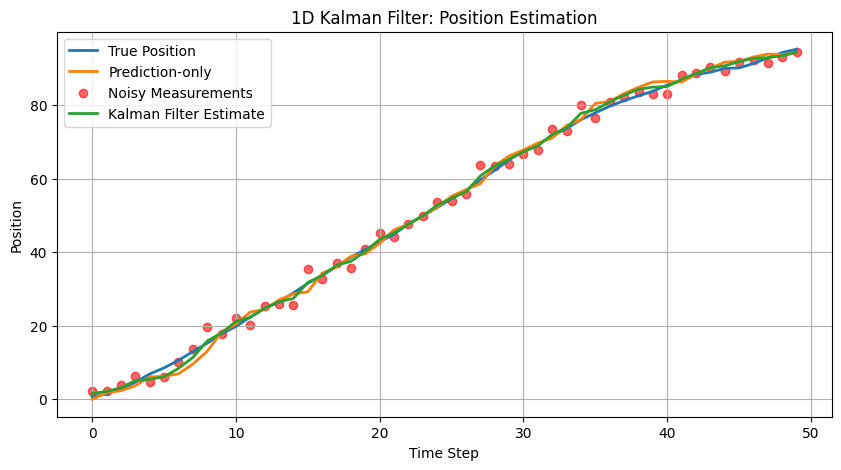

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(13)  # for reproducibility
n_steps = 50        # number of time steps
dt = 1.0           # time step
true_positions = []
measurements = []
position = 0.0
velocity=1.0
measurement_noise_std = 2.0  # sensor noise (R)
acceleration_std= 0.3 # random acceleration
for _ in range(n_steps):
    acceleration = np.random.normal(0, acceleration_std)
    velocity += acceleration * dt
    position += velocity * dt+ 0.5*acceleration*dt**2
    true_positions.append(position)
    noisy_measurement = position + np.random.normal(0, measurement_noise_std)
    measurements.append(noisy_measurement)
# Initial state estimate (position only)
x_est = np.array([[0.0],[0.0]])  # initial guess

# Initial uncertainty
P = np.array([[10.0,0.0],[0.0,1.0]])     # large value = low confidence

# State transition matrix
F = np.array([[1.0 , dt], [0,1]])

# Measurement matrix
H = np.array([[1.0,0]]) # only position is measured

# Process noise (model uncertainty)
Q = np.array([[dt**4/4,dt**3/2],[dt**3/2,dt**2]])*acceleration_std**2

# Measurement noise (sensor uncertainty)
R = np.array([[measurement_noise_std ** 2]])
estimates = []
predictions=[]
for z in measurements:
    # ------------------
    # PREDICTION STEP
    # ------------------
    x_pred = F @ x_est
    P_pred = F @ P @ F.T + Q
    predictions.append(x_pred[0,0])
    # ------------------
    # UPDATE STEP
    # ------------------
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)

    y = np.array([[z]]) - H @ x_pred   # innovation
    x_est = x_pred + K @ y

    P = (np.eye(2) - K @ H) @ P_pred

    estimates.append(x_est[0,0])
plt.figure(figsize=(10, 5))
plt.plot(true_positions, label="True Position", linewidth=2)
plt.plot(predictions,label="Prediction-only",linewidth=2)
plt.scatter(range(n_steps), measurements, label="Noisy Measurements", color="red", alpha=0.6)
plt.plot(estimates, label="Kalman Filter Estimate", linewidth=2)
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("1D Kalman Filter: Position Estimation")
plt.legend()
plt.grid(True)
plt.show()

We cant clearly compare here..but kalman estimate still looks pretty close to true value